In [87]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
#from minepy import MINE

In [88]:
#pip install minepy

In [89]:
#from google.colab import files
#files.upload()

In [90]:
train = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\2nd Project - Predictive Modelling-20240525\train.csv")

In [91]:
train[train.duplicated()]

,Cust_ID,Buy_product,Name,Newsletter_Subscription,Year_Birth,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,...,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation


In [92]:
train.set_index('Cust_ID', inplace = True)

In [93]:
train.shape

(15589, 21)

In [94]:
train.columns

Index(['Buy_product', 'Name', 'Newsletter_Subscription', 'Year_Birth',
       'Membership', 'Preferred_Game_Genre', 'FidelityPoints',
       'S1_GameplayExperience', 'S2_GameMechanics', 'S3_GameBalance',
       'S4_GameLength', 'S5_MaterialQuality', 'S6_ValueForPrice',
       'S7_Artwork_Design', 'S8_ThemeIntegration', 'S9_PlayerIteration',
       'S10_LevelAdjust', 'S11_RuleClarity', 'S12_StrategicThinking',
       'S13_ReplayValue', 'S14_Recommendation'],
      dtype='object')

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15589 non-null  int64  
 1   Name                     15589 non-null  object 
 2   Newsletter_Subscription  15589 non-null  object 
 3   Year_Birth               15394 non-null  float64
 4   Membership               15589 non-null  object 
 5   Preferred_Game_Genre     15589 non-null  object 
 6   FidelityPoints           15589 non-null  int64  
 7   S1_GameplayExperience    15589 non-null  int64  
 8   S2_GameMechanics         15589 non-null  int64  
 9   S3_GameBalance           15589 non-null  int64  
 10  S4_GameLength            15589 non-null  int64  
 11  S5_MaterialQuality       15589 non-null  int64  
 12  S6_ValueForPrice         15589 non-null  int64  
 13  S7_Artwork_Design        15589 non-null  int64  
 14  S8_ThemeIntegration      15

Year of Birth tem nulls
A nossa variavel dependente vai ser a coluna Buy_Product
Newsletter subscription pode ser tranformado em 0 e 1
Membership e Prefered Game_Genre também pode ser tranformados (teremos de analisar)
Tranformar year of birth em idade

In [96]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Buy_product,15589.0,0.543781,0.498096,0.0,0.0,1.0,1.0,1.0
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
FidelityPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
S1_GameplayExperience,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
S2_GameMechanics,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
S3_GameBalance,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
S4_GameLength,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
S5_MaterialQuality,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
S6_ValueForPrice,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
S7_Artwork_Design,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0


Material Quality tem resultados igual a 6 (teremos de ver esta situação)
Variaveis sem resultado igual a 0 (pode ser normal)

In [97]:
train[['FidelityPoints']].kurt()

FidelityPoints    0.260135
dtype: float64

In [98]:
train.describe(include = ['O'])

,Name,Newsletter_Subscription,Membership,Preferred_Game_Genre
count,15589,15589,15589,15589
unique,14227,3,2,3
top,Mr. Michael Smith,yes,Premium,Strategy
freq,9,12548,10756,7442


Podemos obter o sexo do cliente (Female, Male)
Nomes repetidos mas consideramos com cliente individual
Nwesletter - Devia ser sim ou não e temos 3 resultados
Membership ok

In [99]:
train['Newsletter_Subscription'].value_counts()

Newsletter_Subscription
yes    12548
no      2874
y        167
Name: count, dtype: int64

In [100]:
train['Membership'].value_counts()

Membership
Premium        10756
Non-Premium     4833
Name: count, dtype: int64

In [101]:
train['Preferred_Game_Genre'].value_counts()

Preferred_Game_Genre
Strategy    7442
Party       7021
Thematic    1126
Name: count, dtype: int64

In [102]:
train['Newsletter_Subscription'] = train['Newsletter_Subscription'].replace('y','yes')
train['Newsletter_Subscription'].value_counts()

Newsletter_Subscription
yes    12715
no      2874
Name: count, dtype: int64

In [103]:
train[['Gender', 'Complete Name']] = train['Name'].str.split(' ', n=1, expand=True)
train.drop(columns=['Complete Name'], inplace=True)
train.drop(columns=['Name'], inplace=True)
train['Gender'].value_counts()

Gender
Ms.    7985
Mr.    7604
Name: count, dtype: int64

In [104]:
train['Gender'] = train['Gender'].replace('Mr.','Male')
train['Gender'] = train['Gender'].replace('Ms.','Female')
train['Gender'].value_counts()

Gender
Female    7985
Male      7604
Name: count, dtype: int64

Agora trabalhar as variaveis numericas


In [105]:
from datetime import date
train['Age'] = date.today().year - train['Year_Birth']
train.drop(columns=['Year_Birth'], inplace=True)
train

,Buy_product,Newsletter_Subscription,Membership,Preferred_Game_Genre,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,...,S7_Artwork_Design,S8_ThemeIntegration,S9_PlayerIteration,S10_LevelAdjust,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,yes,Premium,Strategy,4907,3,4,1,4,4,...,4,3,3,3,3,4,3,4,Female,50.0
2,1,yes,Premium,Strategy,6724,1,1,1,1,5,...,4,5,5,5,5,1,5,2,Male,59.0
3,0,yes,Premium,Strategy,4365,3,3,3,3,1,...,4,3,3,2,3,2,3,1,Male,51.0
4,1,yes,Non-Premium,Party,3849,1,1,1,1,4,...,5,4,4,4,4,4,4,3,Female,31.0
5,1,yes,Premium,Strategy,5376,2,2,3,2,5,...,5,5,5,3,4,1,3,5,Male,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,0,no,Premium,Party,4968,2,0,2,2,3,...,4,3,4,5,1,3,4,3,Female,36.0
15586,0,no,Premium,Party,4970,3,3,3,3,5,...,5,5,3,1,3,4,4,5,Female,24.0
15587,1,yes,Premium,Strategy,4046,1,1,1,1,3,...,5,4,4,4,4,5,4,4,Male,60.0


In [106]:
train['S5_MaterialQuality'].value_counts()

S5_MaterialQuality
4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: count, dtype: int64

In [107]:
#estamos a assumir que quem respondeu 6 queria dizer 5

train['S5_MaterialQuality'] = train['S5_MaterialQuality'].replace(to_replace = 6 , value = 5)
train['S5_MaterialQuality'].value_counts()

S5_MaterialQuality
4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: count, dtype: int64

In [108]:
print(train["Age"].mean())
print(train["Age"].median())

42.293555930882164
43.0


<Axes: xlabel='Age', ylabel='Count'>

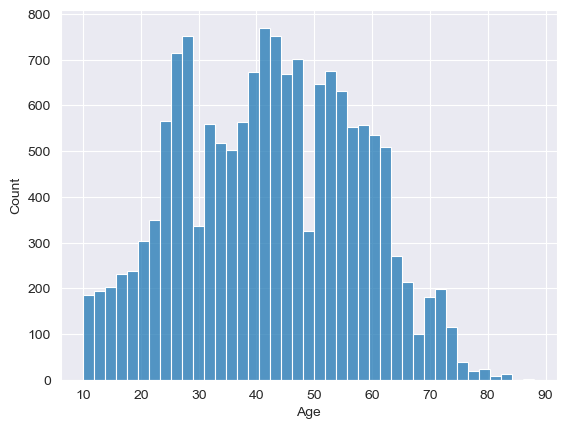

In [109]:
sns.histplot(train, x='Age')

<Axes: xlabel='Age'>

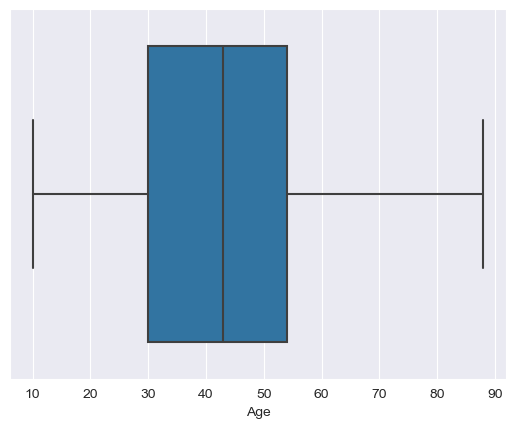

In [110]:
sns.boxplot(train, x='Age')

In [111]:
train['Age'].fillna(train['Age'].mode()[0], inplace=True)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Buy_product              15589 non-null  int64  
 1   Newsletter_Subscription  15589 non-null  object 
 2   Membership               15589 non-null  object 
 3   Preferred_Game_Genre     15589 non-null  object 
 4   FidelityPoints           15589 non-null  int64  
 5   S1_GameplayExperience    15589 non-null  int64  
 6   S2_GameMechanics         15589 non-null  int64  
 7   S3_GameBalance           15589 non-null  int64  
 8   S4_GameLength            15589 non-null  int64  
 9   S5_MaterialQuality       15589 non-null  int64  
 10  S6_ValueForPrice         15589 non-null  int64  
 11  S7_Artwork_Design        15589 non-null  int64  
 12  S8_ThemeIntegration      15589 non-null  int64  
 13  S9_PlayerIteration       15589 non-null  int64  
 14  S10_LevelAdjust          15

<Axes: xlabel='FidelityPoints'>

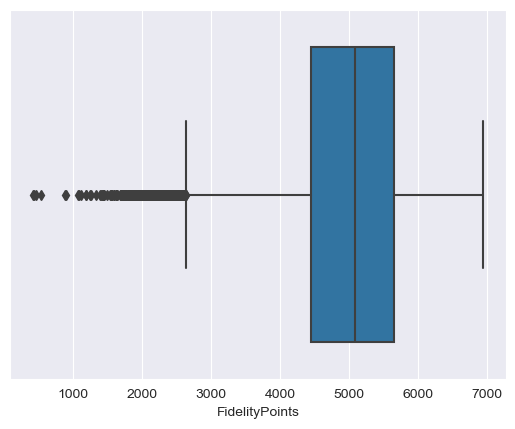

In [113]:
sns.boxplot(train, x='FidelityPoints')

<Axes: >

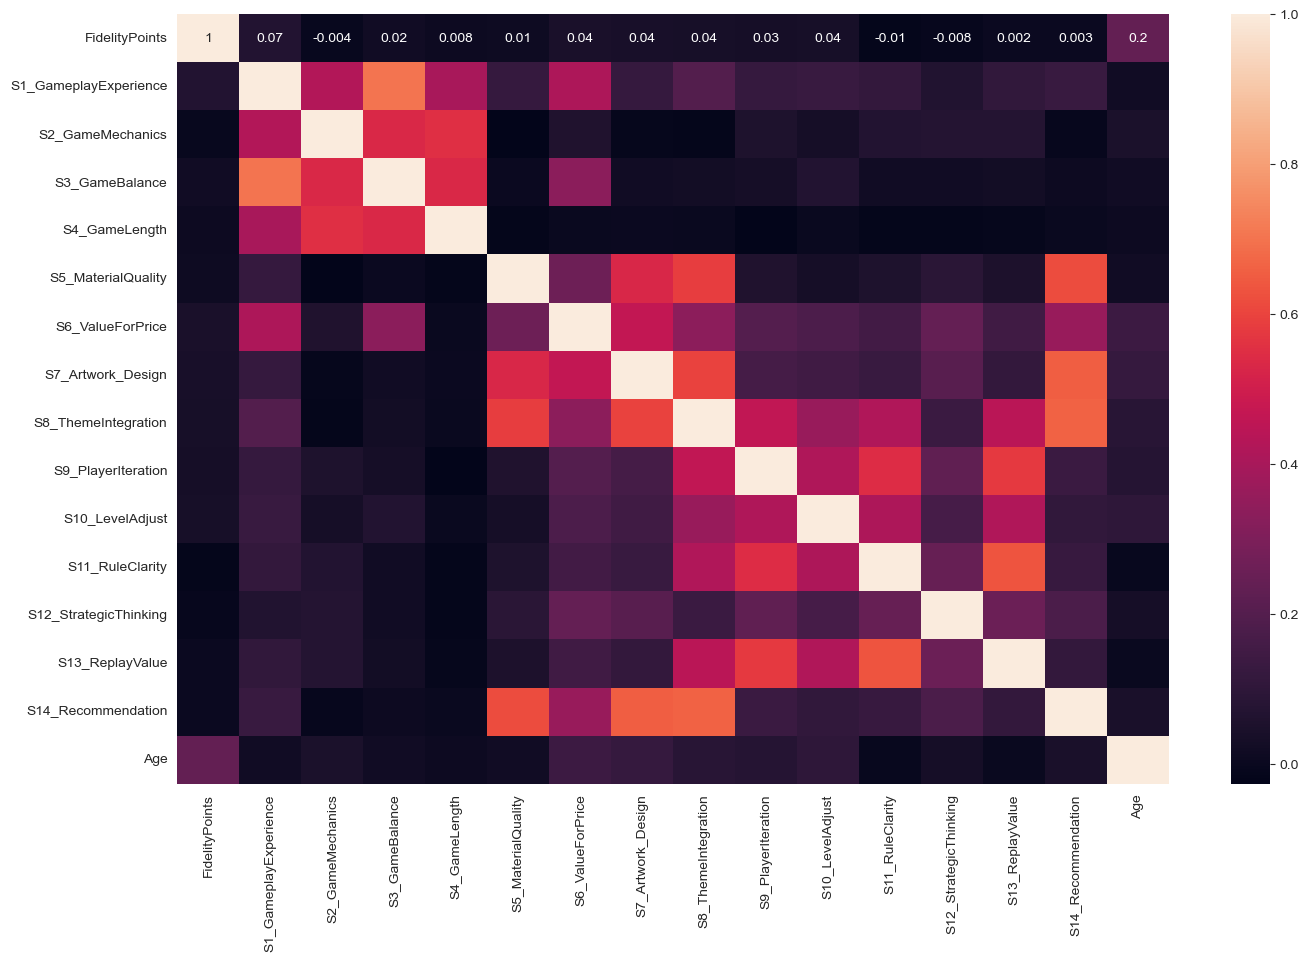

In [114]:
# Drop rows with non-numeric values
# create a new dataframe with just number on it - excluded the categorical values
# Pearson and do not work with binary variables
train_numeric = train.select_dtypes(include='number')

# Drop binary variables
# drop will work for row and columns - when axis = 0 (default) deletes lines
train_spearman = train_numeric.drop(['Buy_product'], axis = 1)

# Calculate correlation matrix
# method corr - correlaçao - pearson é o defult
# heatmap- annot = 1 we want to see the number, fmt we want to see the first significant figure
train_corr = train_spearman.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(train_corr, annot=True, fmt = '.1g')

In [115]:
skf = StratifiedKFold(n_splits = 10, random_state = 99, shuffle = True) #to assure the splits are balanced (could have the data order by data of day, and it can affect the strats)

In [116]:
X = train.drop('Buy_product', axis = 1) #define the independent variables
y = train['Buy_product'].copy() #define the independent variables (our target)

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Newsletter_Subscription  15589 non-null  object 
 1   Membership               15589 non-null  object 
 2   Preferred_Game_Genre     15589 non-null  object 
 3   FidelityPoints           15589 non-null  int64  
 4   S1_GameplayExperience    15589 non-null  int64  
 5   S2_GameMechanics         15589 non-null  int64  
 6   S3_GameBalance           15589 non-null  int64  
 7   S4_GameLength            15589 non-null  int64  
 8   S5_MaterialQuality       15589 non-null  int64  
 9   S6_ValueForPrice         15589 non-null  int64  
 10  S7_Artwork_Design        15589 non-null  int64  
 11  S8_ThemeIntegration      15589 non-null  int64  
 12  S9_PlayerIteration       15589 non-null  int64  
 13  S10_LevelAdjust          15589 non-null  int64  
 14  S11_RuleClarity          15

Categorical Variables - Newsletter_Subscription
Membership
Preferred_Game_Genre
Gender
All the recommendations (ordinal)

In [118]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [119]:
def apply_chisquare(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result) #use the p-value, hypothesis teste

In [120]:
def select_best_cat_features(X,y):
    count = 1

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y): #splits defined before and the it's going to loop. In each each we define which is the x_train and y_index
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['Newsletter_Subscription','Membership','Preferred_Game_Genre','S1_GameplayExperience','S2_GameMechanics','S3_GameBalance','S4_GameLength','S5_MaterialQuality','S6_ValueForPrice','S7_Artwork_Design','S8_ThemeIntegration','S9_PlayerIteration','S10_LevelAdjust','S11_RuleClarity','S12_StrategicThinking','S13_ReplayValue','S14_Recommendation','Gender']].copy()
        #X_train_cat = X_train[['Newsletter_Subscription','Membership','Preferred_Game_Genre','Gender']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)

        count+=1

In [121]:
# Duvida - aqui não deviam ser inseridas apenas as categorical variables?  A Membership  e Preferred_Game_Genre
# no Lab 1 a prof tem "Call the "apply_chisquare" function on your categorical variables"

select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Newsletter_Subscription is IMPORTANT for Prediction
Membership is IMPORTANT for Prediction
Preferred_Game_Genre is IMPORTANT for Prediction
S1_GameplayExperience is IMPORTANT for Prediction
S2_GameMechanics is IMPORTANT for Prediction
S3_GameBalance is IMPORTANT for Prediction
S4_GameLength is IMPORTANT for Prediction
S5_MaterialQuality is IMPORTANT for Prediction
S6_ValueForPrice is IMPORTANT for Prediction
S7_Artwork_Design is IMPORTANT for Prediction
S8_ThemeIntegration is IMPORTANT for Prediction
S9_PlayerIteration is IMPORTANT for Prediction
S10_LevelAdjust is IMPORTANT for Prediction
S11_RuleClarity is IMPORTANT for Prediction
S12_StrategicThinking is IMPORTANT for Prediction
S13_ReplayValue is IMPORTANT fo

In [122]:
numerical_columns = X.select_dtypes(include=[np.number]).columns

In [123]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

In [124]:
numerical_columns

Index(['FidelityPoints', 'S1_GameplayExperience', 'S2_GameMechanics',
       'S3_GameBalance', 'S4_GameLength', 'S5_MaterialQuality',
       'S6_ValueForPrice', 'S7_Artwork_Design', 'S8_ThemeIntegration',
       'S9_PlayerIteration', 'S10_LevelAdjust', 'S11_RuleClarity',
       'S12_StrategicThinking', 'S13_ReplayValue', 'S14_Recommendation',
       'Age'],
      dtype='object')

In [125]:
def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        for var in numerical_columns:
          apply_variance(X_train[var], var)

        count+=1

In [126]:
select_features_variance(X,y) #variance equal 0 (constant) - we can remove them from the model

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
FidelityPoints:1051626.428342346
S1_GameplayExperience:1.9314681425357318
S2_GameMechanics:2.299376421522324
S3_GameBalance:2.065816222144778
S4_GameLength:1.6901565116593278
S5_MaterialQuality:1.7568362287121941
S6_ValueForPrice:1.8286893908335806
S7_Artwork_Design:1.7410105896619636
S8_ThemeIntegration:1.719374697163966
S9_PlayerIteration:1.6128964962964025
S10_LevelAdjust:1.6755841364545858
S11_RuleClarity:1.3392410497612084
S12_StrategicThinking:1.6089188686484452
S13_ReplayValue:1.335149723206049
S14_Recommendation:1.6950349309522683
Age:228.96721969413835
_________________________________________________________________________________________________

                                     SPLIT 2           

In [127]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [128]:
def apply_correlation(X_train):
    correlation_data = X
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

In [129]:
def redundant_features(X,y): #isto é dentro do splits, por isso é que voltamos a fazer o loop
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


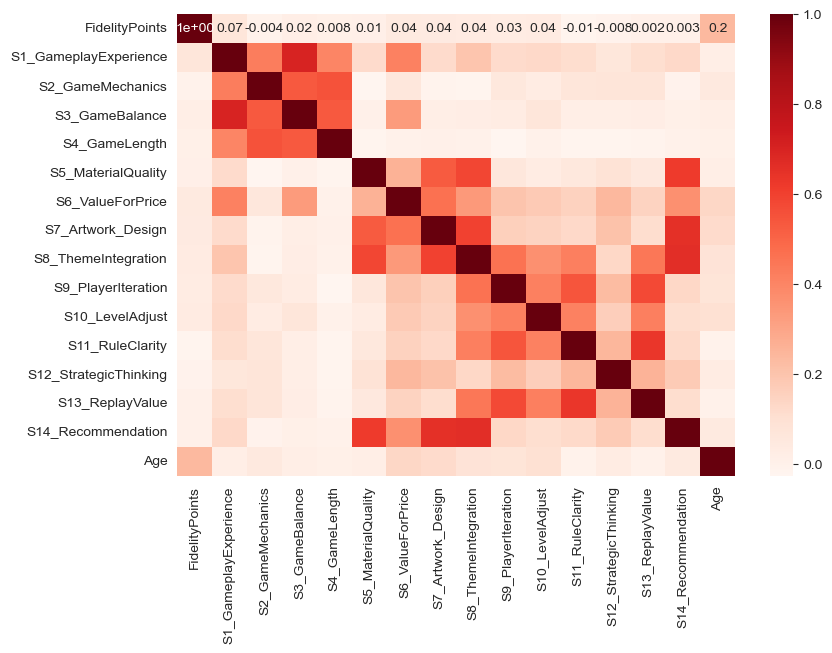

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


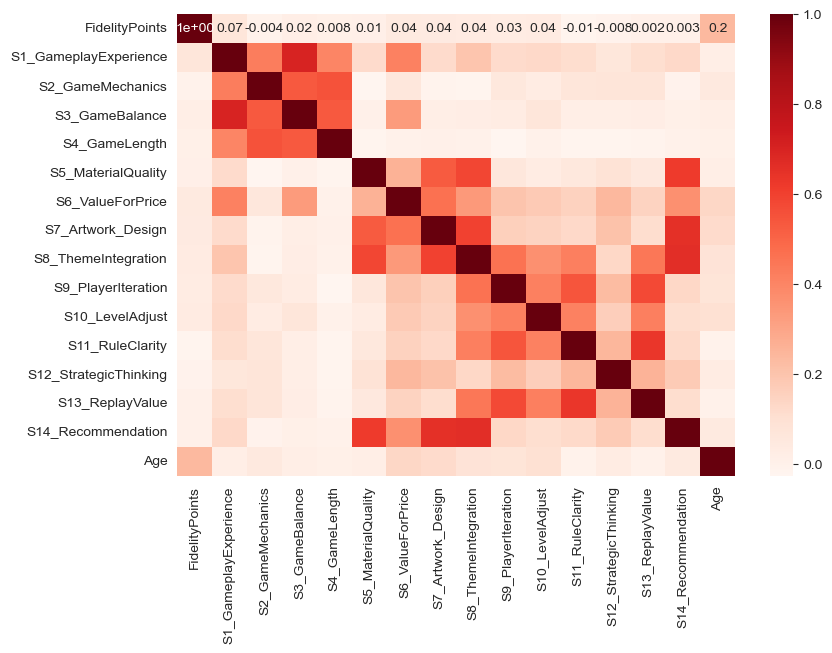

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


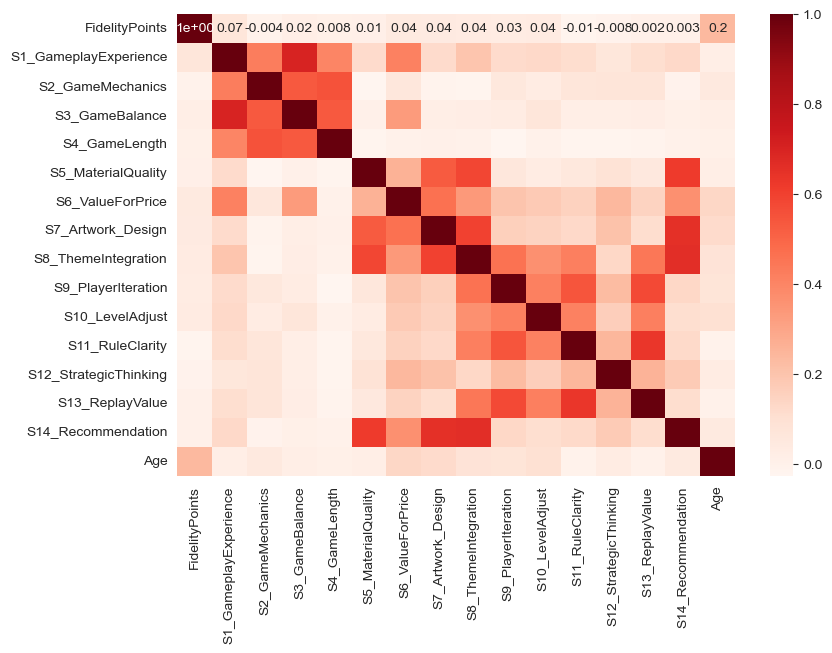

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


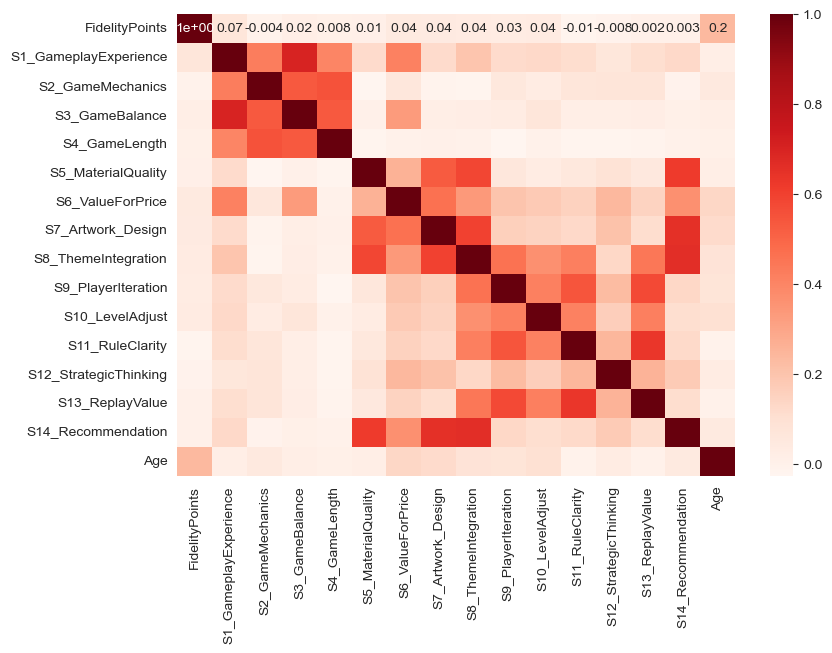

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


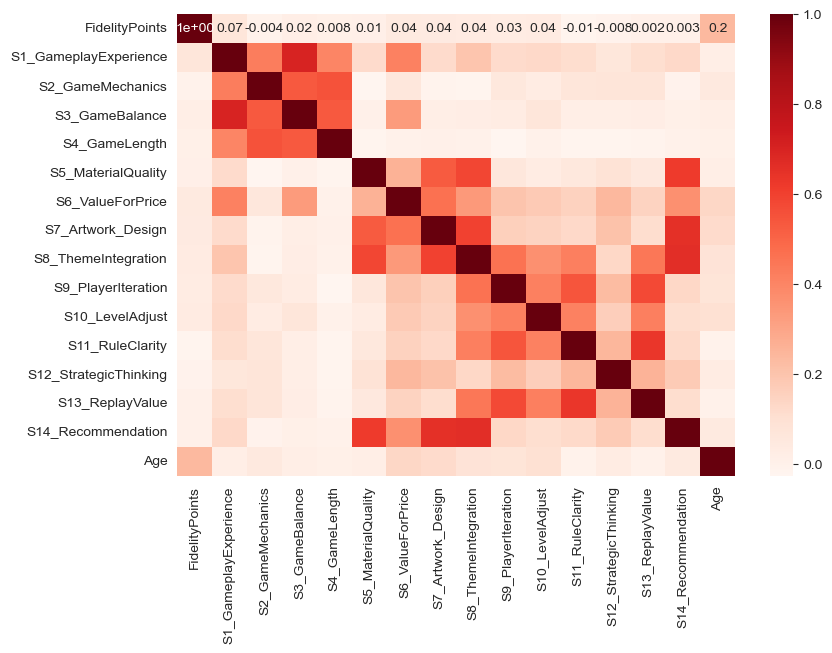

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________


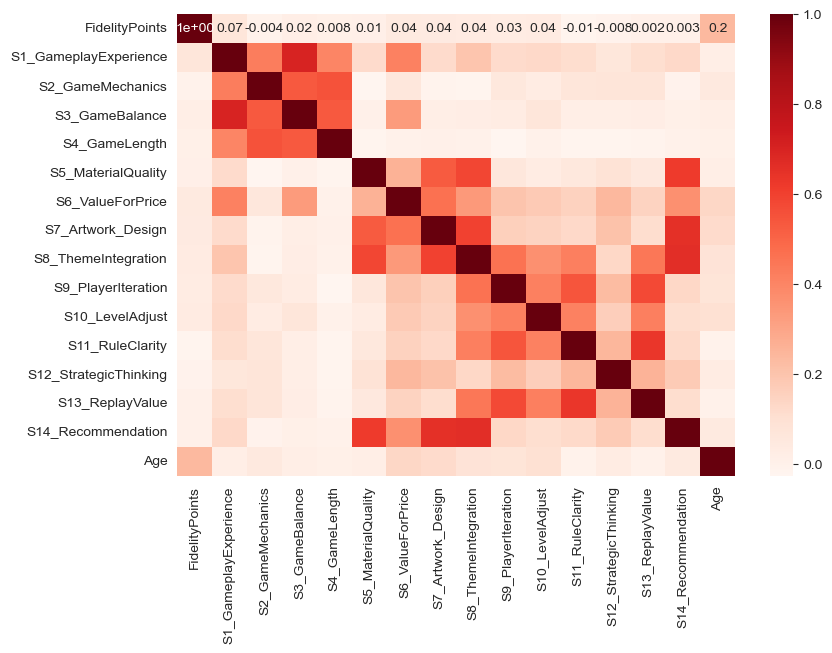

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________


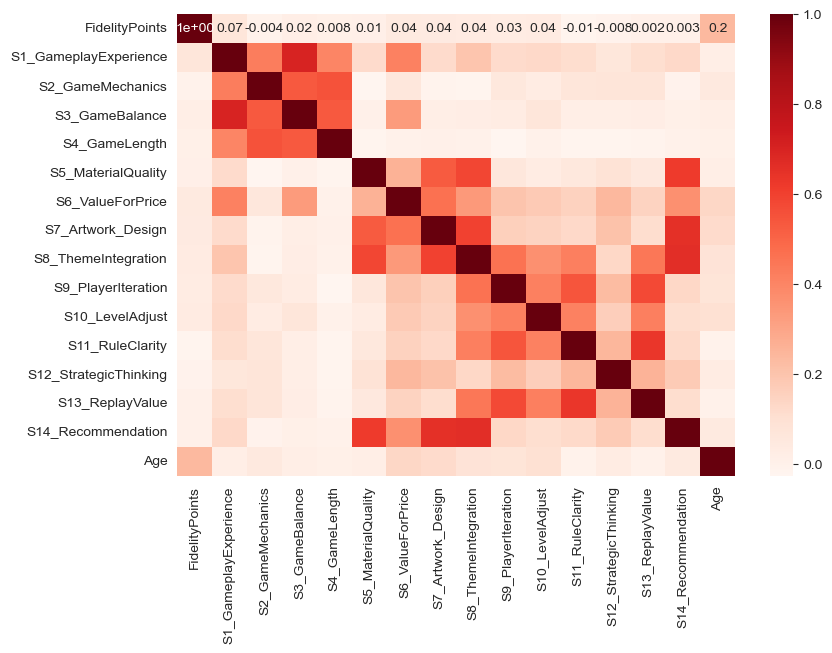

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________


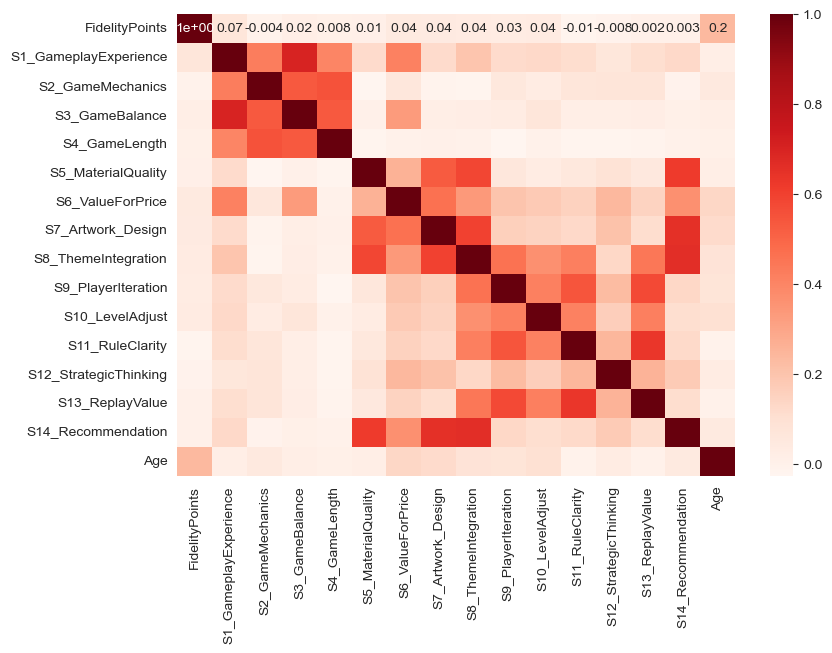

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________


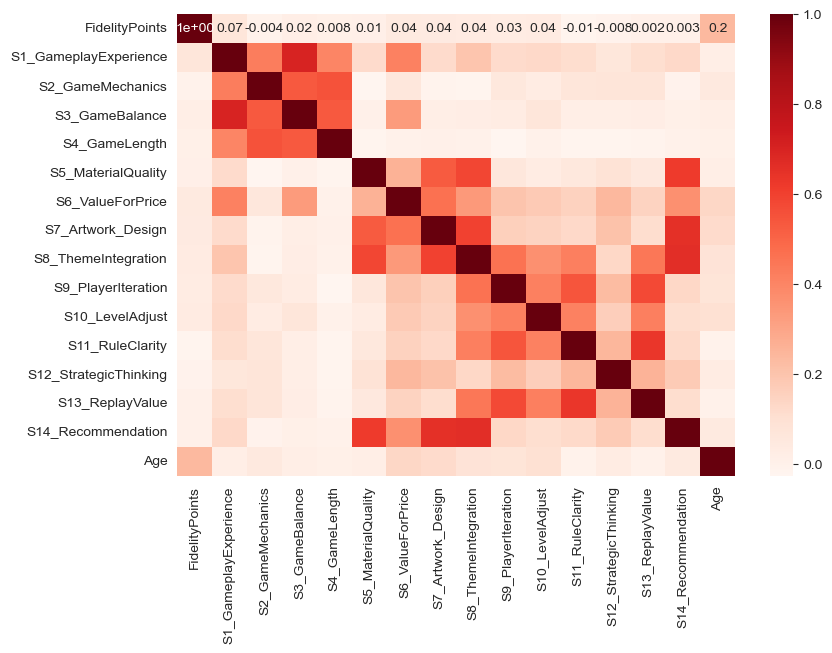

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________


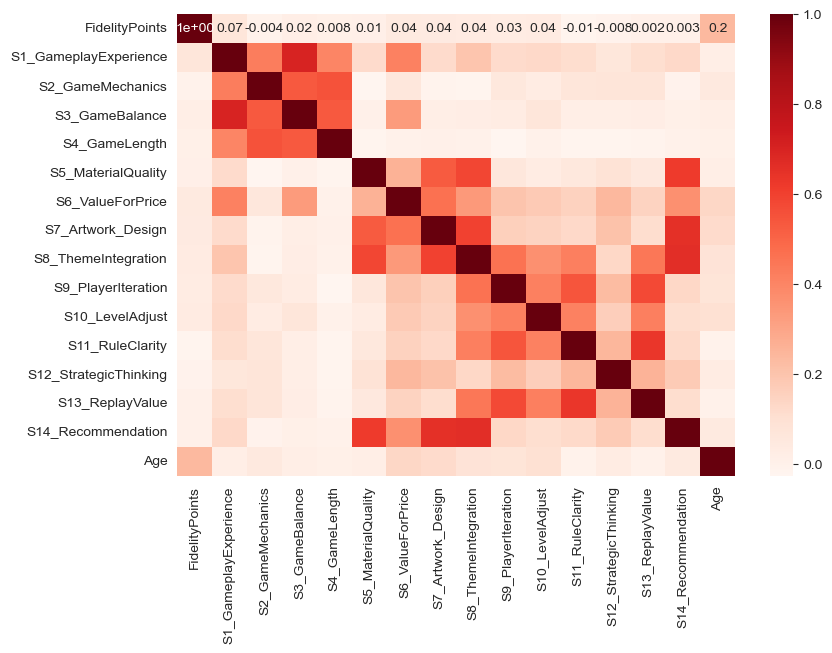

In [130]:
redundant_features(X, y)

In [131]:
def plot_importance(variables,name): #this fuincation is going to receive the importance of the features
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [132]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train) #recieving the data for training and apply the decision tree
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 1 to 15589
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Newsletter_Subscription  15589 non-null  object 
 1   Membership               15589 non-null  object 
 2   Preferred_Game_Genre     15589 non-null  object 
 3   FidelityPoints           15589 non-null  int64  
 4   S1_GameplayExperience    15589 non-null  int64  
 5   S2_GameMechanics         15589 non-null  int64  
 6   S3_GameBalance           15589 non-null  int64  
 7   S4_GameLength            15589 non-null  int64  
 8   S5_MaterialQuality       15589 non-null  int64  
 9   S6_ValueForPrice         15589 non-null  int64  
 10  S7_Artwork_Design        15589 non-null  int64  
 11  S8_ThemeIntegration      15589 non-null  int64  
 12  S9_PlayerIteration       15589 non-null  int64  
 13  S10_LevelAdjust          15589 non-null  int64  
 14  S11_RuleClarity          15

In [134]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using decision Tree
        X_train = X_train.drop([ 'Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1)
        apply_dt(X_train, y_train)

        count+=1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


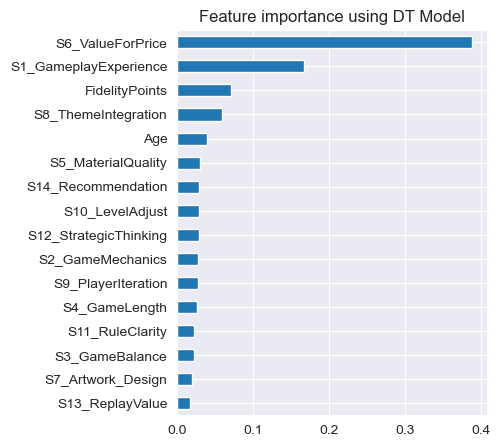

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


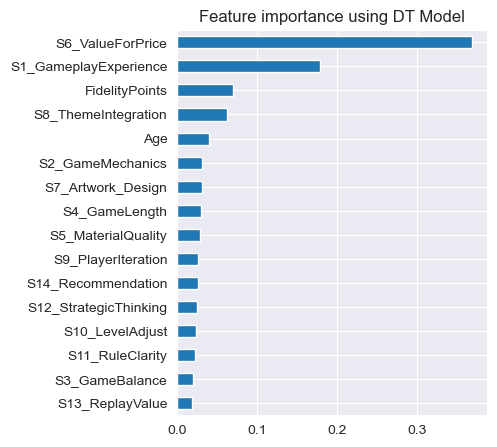

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


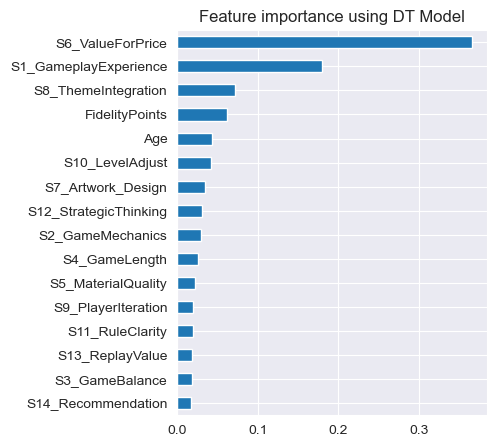

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


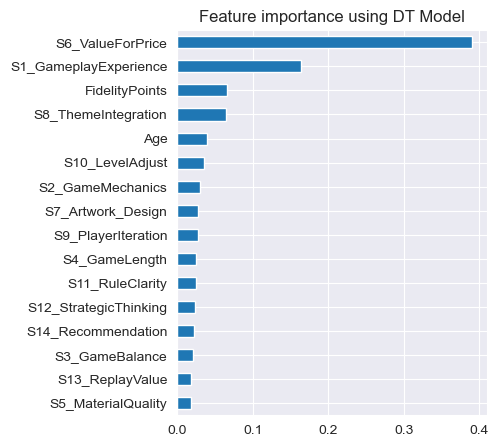

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


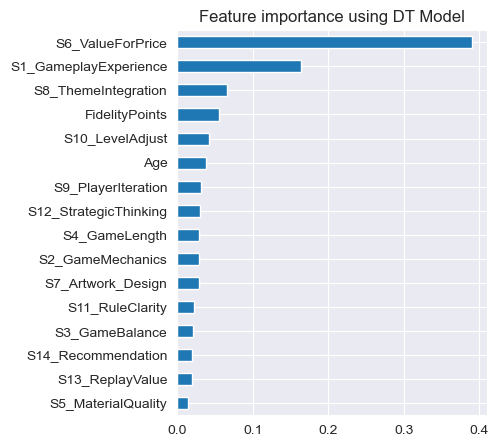

_________________________________________________________________________________________________

                                     SPLIT 6                                    
_________________________________________________________________________________________________


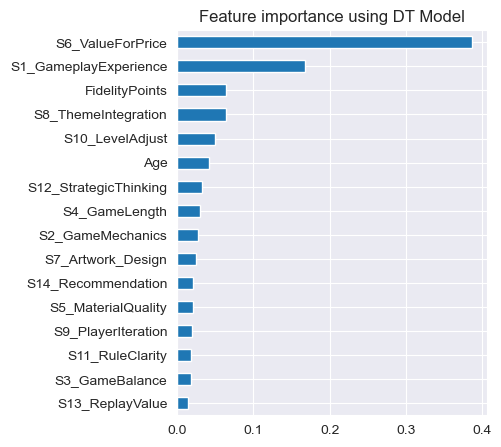

_________________________________________________________________________________________________

                                     SPLIT 7                                    
_________________________________________________________________________________________________


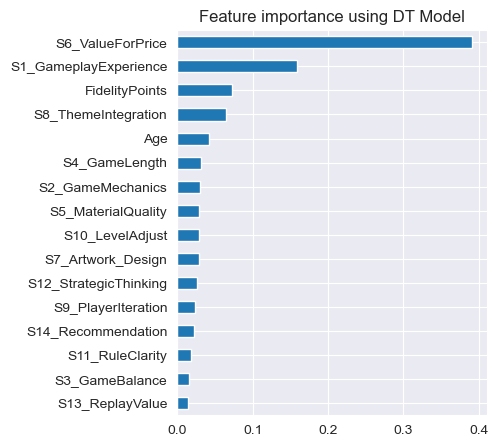

_________________________________________________________________________________________________

                                     SPLIT 8                                    
_________________________________________________________________________________________________


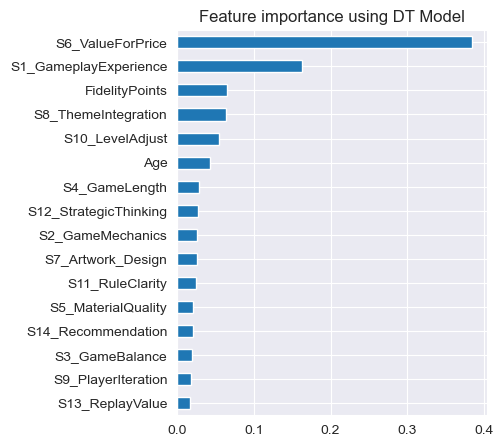

_________________________________________________________________________________________________

                                     SPLIT 9                                    
_________________________________________________________________________________________________


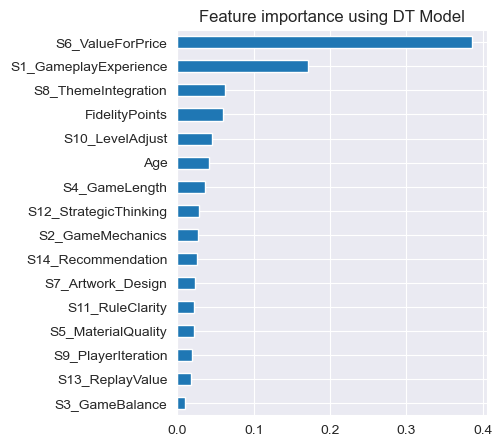

_________________________________________________________________________________________________

                                     SPLIT 10                                    
_________________________________________________________________________________________________


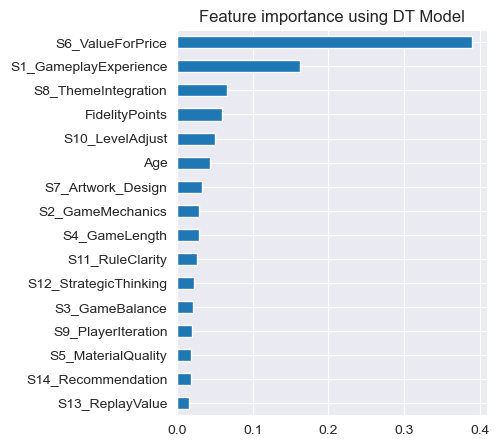

In [135]:
select_best_features_dt(X, y)

In [136]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5) #define characteristics of rfe
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

In [137]:
def apply_lasso(X_train, y_train):
    X_train = X_train
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    coef_df = coef.reset_index()
    coef_df.columns = ['Feature', 'Coefficient']
    print(coef_df)
    #plot_importance(coef,'Lasso')


In [138]:
def select_best_features_lasso(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        count+=1

In [139]:
select_best_features_lasso(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- LASSO ----------------------
                  Feature  Coefficient
0          FidelityPoints    -0.007637
1   S1_GameplayExperience     0.122758
2        S2_GameMechanics    -0.141646
3          S3_GameBalance    -0.123742
4           S4_GameLength     0.069820
5      S5_MaterialQuality    -0.058446
6        S6_ValueForPrice     0.675351
7       S7_Artwork_Design     0.123737
8     S8_ThemeIntegration     0.270959
9      S9_PlayerIteration     0.200047
10        S10_LevelAdjust     0.218605
11        S11_RuleClarity     0.011296
12  S12_StrategicThinking     0.153473
13        S13_ReplayValue    -0.000000
14     S14_Recommendation     0.060915
15                    Age     0.083507
___________

                        Split_1   Split_2   Split_3   Split_4   Split_5  \
S6_ValueForPrice       0.390704  0.369270  0.365967  0.390551  0.390831   
S1_GameplayExperience  0.166536  0.180064  0.180334  0.163340  0.164148   
FidelityPoints         0.070501  0.072675  0.062339  0.066674  0.054415   
S8_ThemeIntegration    0.058434  0.061552  0.070782  0.065755  0.067943   
S10_LevelAdjust        0.026486  0.023386  0.043571  0.036042  0.043020   
Age                    0.036112  0.037125  0.043325  0.036760  0.039282   
S4_GameLength          0.027342  0.029128  0.027117  0.025464  0.029571   
S2_GameMechanics       0.027124  0.032214  0.030616  0.031923  0.030305   
S12_StrategicThinking  0.028086  0.026961  0.029683  0.022246  0.028420   
S7_Artwork_Design      0.020699  0.030624  0.034726  0.028621  0.027919   
S9_PlayerIteration     0.027531  0.025434  0.019733  0.027051  0.031458   
S14_Recommendation     0.028633  0.024451  0.017441  0.021313  0.019752   
S5_MaterialQuality     0.

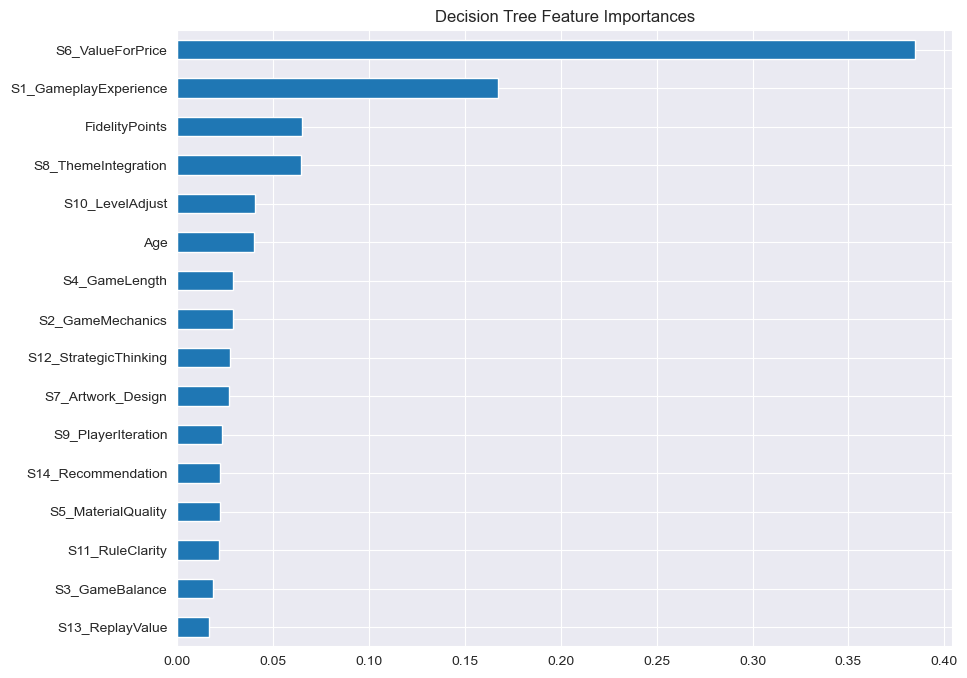

In [140]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Mock apply_dt function
def apply_dt(X, y):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X, y)
    return model.feature_importances_

# Function to select best features using Decision Tree
def select_best_features_dt_1(X, y):
    skf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
    all_importances = []

    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale numerical data
        numerical_data = X_train.drop(['Gender', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre'], axis=1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_data.columns)

        # Check which features to use using Decision Tree
        feature_importances = apply_dt(X_train_scaled, y_train)
        all_importances.append(feature_importances)

        count += 1

    # Create a DataFrame from the results
    importance_df = pd.DataFrame(all_importances, columns=numerical_data.columns).T
    importance_df.columns = [f'Split_{i}' for i in range(1, count)]
    importance_df['Mean_Importance'] = importance_df.mean(axis=1)
    importance_df = importance_df.sort_values(by='Mean_Importance', ascending=False)

    return importance_df

# Assuming X and y are defined elsewhere in your script
importance_df = select_best_features_dt_1(X, y)
print(importance_df)

# Function to plot the mean feature importances
def plot_importance(importances, title):
    plt.figure(figsize=(10, 8))
    importances.sort_values().plot(kind='barh')
    plt.title(title)
    plt.show()

# Plot the mean feature importances
plot_importance(importance_df['Mean_Importance'], 'Decision Tree Feature Importances')

In [141]:
def select_best_features_rfe(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ########################################### SCALE DATA ####################################################
        numerical_data = X_train.drop(['Gender','Newsletter_Subscription','Membership', 'Preferred_Game_Genre'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        count+=1

In [142]:
select_best_features_rfe(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
FidelityPoints           False
S1_GameplayExperience    False
S2_GameMechanics         False
S3_GameBalance           False
S4_GameLength            False
S5_MaterialQuality       False
S6_ValueForPrice          True
S7_Artwork_Design        False
S8_ThemeIntegration       True
S9_PlayerIteration        True
S10_LevelAdjust           True
S11_RuleClarity          False
S12_StrategicThinking     True
S13_ReplayValue          False
S14_Recommendation       False
Age                      False
dtype: bool
_________________________________________________________________________________________________

                                     SPLIT 2                         

**Feature Selection with Random Forests**

"Another useful approach for selecting relevant features from a dataset is using a random forest, an ensemble technique.
Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without
making any assumptions about whether our data is linearly separable or not. Conveniently, the random forest implementation in scikit-learn already collects the feature importance values for us so that we can access them via the feature_importances_ attribute after fitting a RandomForestClassifier."

*Machine Learning with PyTorch and Scikit Learn* p. 134

In [143]:
# copiar dataframe para testar com random forests
train_rf = train.copy()

**One hot encoding for categorical variables**

"When we are using one-hot encoding datasets, we have to keep in mind that this introduces multicollinearity, which can be an issue for certain methods.
If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array."

*Machine Learning with PyTorch and Scikit Learn* p. 115



In [144]:
# Transformar as categorical variables em features com binary
# drop_first=True devido ao parágrafo anterior
train_rf_dummies = pd.get_dummies(train_rf[["Newsletter_Subscription", "Membership", "Gender", "Preferred_Game_Genre"]], dtype=int, drop_first=True)
train_rf = train_rf.merge(train_rf_dummies, how='left', left_index=True, right_index=True)
train_rf = train_rf.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])
train_rf

,Buy_product,FidelityPoints,S1_GameplayExperience,S2_GameMechanics,S3_GameBalance,S4_GameLength,S5_MaterialQuality,S6_ValueForPrice,S7_Artwork_Design,S8_ThemeIntegration,...,S11_RuleClarity,S12_StrategicThinking,S13_ReplayValue,S14_Recommendation,Age,Newsletter_Subscription_yes,Membership_Premium,Gender_Male,Preferred_Game_Genre_Strategy,Preferred_Game_Genre_Thematic
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,4907,3,4,1,4,4,3,4,3,...,3,4,3,4,50.0,1,1,0,1,0
2,1,6724,1,1,1,1,5,3,4,5,...,5,1,5,2,59.0,1,1,1,1,0
3,0,4365,3,3,3,3,1,4,4,3,...,3,2,3,1,51.0,1,1,1,1,0
4,1,3849,1,1,1,1,4,4,5,4,...,4,4,4,3,31.0,1,0,0,0,0
5,1,5376,2,2,3,2,5,5,5,5,...,4,1,3,5,35.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,0,4968,2,0,2,2,3,2,4,3,...,1,3,4,3,36.0,0,1,0,0,0
15586,0,4970,3,3,3,3,5,3,5,5,...,3,4,4,5,24.0,0,1,0,0,0
15587,1,4046,1,1,1,1,3,4,5,4,...,4,5,4,4,60.0,1,1,1,1,0


In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
# usa o default Gini
forest = RandomForestClassifier()

In [147]:
target = train_rf["Buy_product"].copy()
features = train_rf.drop(columns="Buy_product").copy()

In [148]:
rf = forest.fit(features, target)
rf.feature_importances_

array([0.04612368, 0.12536716, 0.0265377 , 0.04027851, 0.02260147,
       0.01948633, 0.20053107, 0.06367688, 0.08365277, 0.0369338 ,
       0.04828932, 0.02616331, 0.03149322, 0.02480809, 0.03257083,
       0.03860657, 0.0397151 , 0.02301906, 0.03075257, 0.03640948,
       0.00298309])

Text(0.5, 1.0, 'Feature importances')

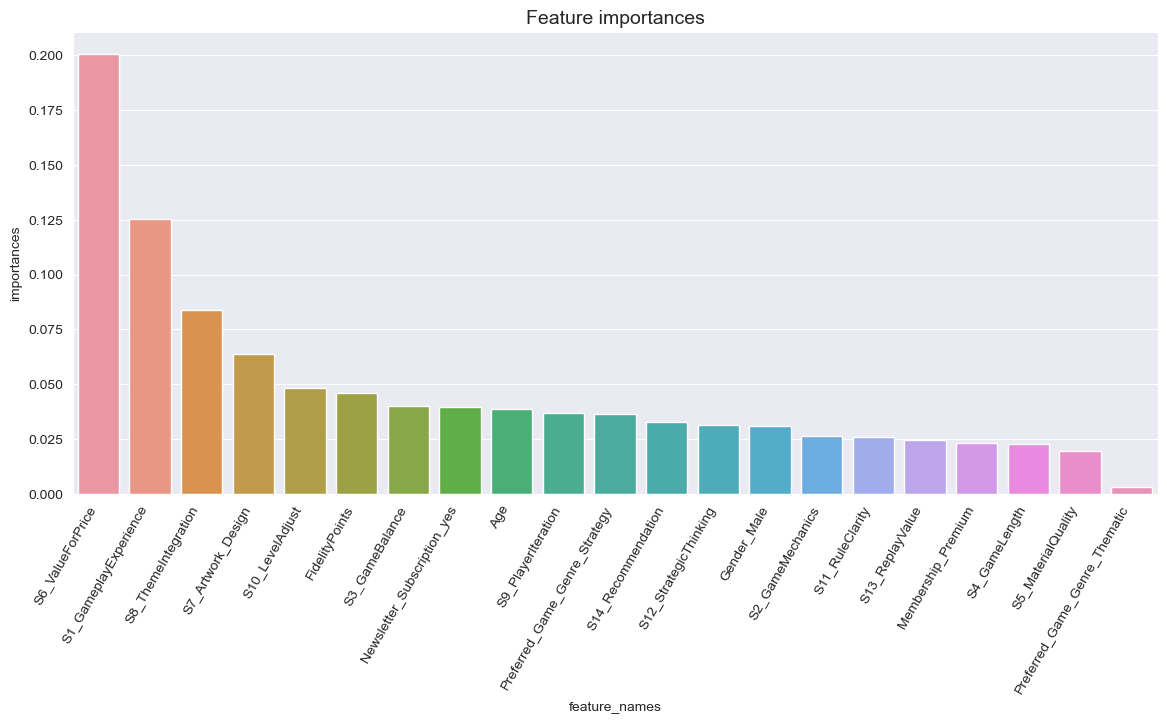

In [149]:
feature_importance_df = pd.DataFrame({"feature_names" : rf.feature_names_in_, "importances" : rf.feature_importances_}).sort_values("importances", ascending=False)
sns.set_style('darkgrid')
plt.subplots(figsize=(14, 6))
fig = sns.barplot(feature_importance_df, x=feature_importance_df["feature_names"], y=feature_importance_df["importances"])
plt.xticks(rotation=60, ha='right')
fig.set_title("Feature importances", fontsize=14)

**Feature Selection with Permutation**

Permutation importance assesses the significance of each feature independently in out-of-bag cross-validated predictions, providing a more reliable and robust measure.

By evaluating the impact of individual feature permutations on predictions, it calculates importance. This method involves randomly shuffling a single feature’s values and measuring the resulting performance decrease (e.g., accuracy, F1-score). Comparing the model’s original and permuted values allows for a precise evaluation of feature importance.

The code uses the permutation_importance function to calculate permutation feature importance for each feature in a trained classifier, where:

n_repeats: Specifies how many times each feature is permuted to calculate the importance.

n_jobs: Determines the number of parallel jobs to run. Setting it to -1 utilizes all available CPU cores, improving computation speed.

(https://www.geeksforgeeks.org/feature-importance-with-random-forests/)

In [150]:
from sklearn.inspection import permutation_importance

In [151]:
result = permutation_importance(rf, features, target, n_repeats=10, random_state=0, n_jobs=-1)

In [152]:
# A funcao faz um shuffle das features e vê quais afetam mais o resultado. Quanto mais alta a Permutation Importance, mais diferença o shuffle nessa feature causou, ou seja, mais importante é.
perm_imp_df = pd.DataFrame({'Feature': rf.feature_names_in_, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_df

,Feature,Permutation Importance
1,S1_GameplayExperience,0.110642
6,S6_ValueForPrice,0.058259
16,Newsletter_Subscription_yes,0.038514
18,Gender_Male,0.019661
12,S12_StrategicThinking,0.019257
10,S10_LevelAdjust,0.016935
7,S7_Artwork_Design,0.015691
8,S8_ThemeIntegration,0.013272
19,Preferred_Game_Genre_Strategy,0.012939
17,Membership_Premium,0.010328


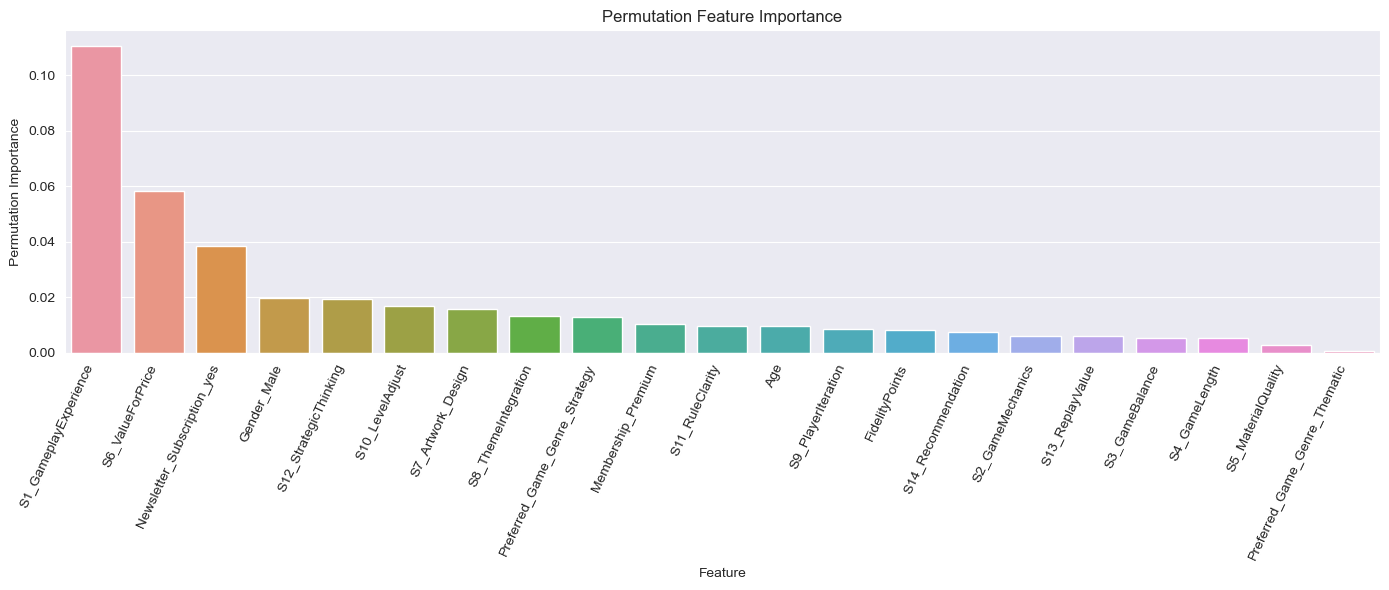

In [153]:
plt.figure(figsize=(14, 6))
fig = sns.barplot(perm_imp_df, x=perm_imp_df["Feature"], y=perm_imp_df["Permutation Importance"])
#plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

In [154]:
import pandas as pd
dados_modelos = {
    'DT': [
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'FidelityPoints',
        'S8_ThemeIntegration',
        'Age',
        'S10_LevelAdjust'
    ],
    'LASSO': [
        'S1_GameplayExperience',
        'S2_GameMechanics',
        'S3_GameBalance',
        'S4_GameLength',
        'S5_MaterialQuality',
        'S6_ValueForPrice',
        'S7_Artwork_Design',
        'S8_ThemeIntegration',
        'S9_PlayerIteration',
        'S10_LevelAdjust',
        'S12_StrategicThinking',
        'S14_Recommendation',
        'Age'
    ],
    'Random_Forest_GINI': [
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'S7_Artwork_Design',
        'S8_ThemeIntegration',
        'S10_LevelAdjust',
        'FidelityPoints',
        'S9_PlayerIteraction',
        'S3_GameBalance'
    ],
    'Random_Forest_PI': [
        'S1_GameplayExperience',
        'S6_ValueForPrice',
        'Newsletter Subscription Yes',
        'S12_StrategicThinking',
        'S7_Artwork_Design',
        'S10_LevelAdjust'
    ],

    'RFE': [
        'S6_ValueForPrice',
        'S8_ThemeIntegration',
        'S9_PlayerIteration',
        'S10_LevelAdjust',
        'S12_StrategicThinking'
    ],
    'MIC':[
        'S6_ValueForPrice',
        'S1_GameplayExperience',
        'S8_ThemeIntegration',
        'S7_Artwork_Design',
        'S14_Recommendation'
    ]
}

df_modelos = pd.DataFrame.from_dict(dados_modelos, orient='index')
df_modelos = df_modelos.transpose()
df_modelos

,DT,LASSO,Random_Forest_GINI,Random_Forest_PI,RFE,MIC
0,S6_ValueForPrice,S1_GameplayExperience,S6_ValueForPrice,S1_GameplayExperience,S6_ValueForPrice,S6_ValueForPrice
1,S1_GameplayExperience,S2_GameMechanics,S1_GameplayExperience,S6_ValueForPrice,S8_ThemeIntegration,S1_GameplayExperience
2,FidelityPoints,S3_GameBalance,S7_Artwork_Design,Newsletter Subscription Yes,S9_PlayerIteration,S8_ThemeIntegration
3,S8_ThemeIntegration,S4_GameLength,S8_ThemeIntegration,S12_StrategicThinking,S10_LevelAdjust,S7_Artwork_Design
4,Age,S5_MaterialQuality,S10_LevelAdjust,S7_Artwork_Design,S12_StrategicThinking,S14_Recommendation
5,S10_LevelAdjust,S6_ValueForPrice,FidelityPoints,S10_LevelAdjust,None,None
6,None,S7_Artwork_Design,S9_PlayerIteraction,None,None,None
7,None,S8_ThemeIntegration,S3_GameBalance,None,None,None
8,None,S9_PlayerIteration,None,None,None,None
9,None,S10_LevelAdjust,None,None,None,None


In [155]:
sets = [set(df_modelos[col]) for col in df_modelos.columns]
common_values = set.intersection(*sets)
common_values_list = list(common_values)
common_values

{'S6_ValueForPrice'}

In [156]:
all_values = df_modelos.values.flatten()
value_counts = pd.Series(all_values).value_counts()
value_counts


S6_ValueForPrice               6
S1_GameplayExperience          5
S8_ThemeIntegration            5
S10_LevelAdjust                5
S7_Artwork_Design              4
S12_StrategicThinking          3
FidelityPoints                 2
S3_GameBalance                 2
S9_PlayerIteration             2
Age                            2
S14_Recommendation             2
S2_GameMechanics               1
Newsletter Subscription Yes    1
S4_GameLength                  1
S5_MaterialQuality             1
S9_PlayerIteraction            1
Name: count, dtype: int64

In [157]:
keep_data = train[['S6_ValueForPrice','S1_GameplayExperience','S8_ThemeIntegration','S10_LevelAdjust', 'Buy_product', 'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre', 'Gender']].copy()
all_data = train[['S6_ValueForPrice','S1_GameplayExperience','S8_ThemeIntegration','S10_LevelAdjust','S7_Artwork_Design','S12_StrategicThinking','S14_Recommendation','Age','S9_PlayerIteration','S3_GameBalance','FidelityPoints','Buy_product',  'Newsletter_Subscription', 'Membership', 'Preferred_Game_Genre', 'Gender']].copy()

In [158]:
# keep_data com dummie variables: keep_data_encoded
train_keepdata_dummies = pd.get_dummies(keep_data[["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"]], dtype=int, drop_first=True)
keep_data_encoded = keep_data.merge(train_keepdata_dummies, how='left', left_index=True, right_index=True)
keep_data_encoded = keep_data_encoded.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])

In [159]:
# all_data com dummie variables: all_data_encoded
train_alldata_dummies = pd.get_dummies(all_data[["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"]], dtype=int, drop_first=True)
all_data_encoded = all_data.merge(train_alldata_dummies, how='left', left_index=True, right_index=True)
all_data_encoded = all_data_encoded.drop(columns=["Newsletter_Subscription", "Membership", "Preferred_Game_Genre", "Gender"])

In [160]:
# fazemos scalling das variáveis sem o target, criamos uma df e juntamos tudo de novo. A df final tem o target como estava e as variáveis scaled.

#separar as features do target
keep_data_encoded_X = keep_data_encoded.drop(columns='Buy_product').copy()
keep_data_encoded_y = keep_data_encoded["Buy_product"].copy()

all_data_encoded_X = all_data_encoded.drop(columns='Buy_product').copy()
all_data_encoded_y = all_data_encoded["Buy_product"].copy()

# scale as features
scaler = MinMaxScaler()
scaled_keep = scaler.fit_transform(keep_data_encoded_X)
scaled_all = scaler.fit_transform(all_data_encoded_X)

# criar df com os novos dados
keep_data_encoded_scaled = pd.DataFrame(scaled_keep, columns=keep_data_encoded_X.columns, index=keep_data_encoded_X.index)
keep_data_encoded_scaled = keep_data_encoded_scaled.merge(keep_data_encoded_y, left_index=True, right_index=True)

all_data_encoded_scaled = pd.DataFrame(scaled_all, columns=all_data_encoded_X.columns, index=all_data_encoded_X.index)
all_data_encoded_scaled = all_data_encoded_scaled.merge(all_data_encoded_y, left_index=True, right_index=True)


In [165]:
keep_data_encoded.to_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\keep_data_enc.csv")
all_data_encoded.to_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\all_data_enc.csv")

keep_data_encoded_scaled.to_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\keep_data_scl.csv")
all_data_encoded_scaled.to_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\all_data_scl.csv")

In [164]:
keep_data_encoded_scaled

,S6_ValueForPrice,S1_GameplayExperience,S8_ThemeIntegration,S10_LevelAdjust,Newsletter_Subscription_yes,Membership_Premium,Preferred_Game_Genre_Strategy,Preferred_Game_Genre_Thematic,Gender_Male,Buy_product
Cust_ID,,,,,,,,,,
1,0.6,0.6,0.6,0.6,1.0,1.0,1.0,0.0,0.0,0
2,0.6,0.2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
3,0.8,0.6,0.6,0.4,1.0,1.0,1.0,0.0,1.0,0
4,0.8,0.2,0.8,0.8,1.0,0.0,0.0,0.0,0.0,1
5,1.0,0.4,1.0,0.6,1.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
15585,0.4,0.4,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0
15586,0.6,0.6,1.0,0.2,0.0,1.0,0.0,0.0,0.0,0
15587,0.8,0.2,0.8,0.8,1.0,1.0,1.0,0.0,1.0,1


Decision Tree - Renato

KNN - Rui

Neural Networks - Haneet

SVM - Mario

Random Forest - Sérgio



